<h1>Iris Dataset Analysis</h1>

<h3>Load libraries and Data</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder

In [8]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Explotory Data Analysis</h3>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h3>Data Visualization</h3>

<AxesSubplot: xlabel='Species', ylabel='count'>

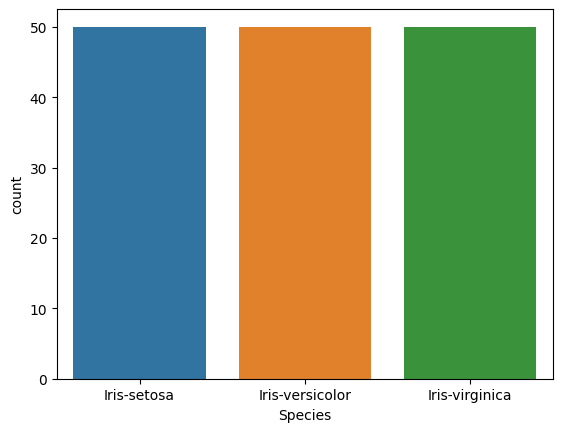

In [21]:
sns.countplot(df,x=df["Species"])


In [40]:

fig=px.scatter(df,x="SepalLengthCm",y="SepalWidthCm",color="Species")
fig.update_layout(height=600,width=1000)
fig.update_traces(marker_size=10)


In [45]:
fig=px.scatter(df,x="PetalLengthCm",y="PetalWidthCm", color="Species")
fig.update_layout(height=600,width=1000)
fig.update_traces(marker_size=10)

In [51]:
fig=px.histogram(df,x="PetalLengthCm",nbins=20)
fig.update_layout(height=600,width=1000)
fig.show()

In [58]:
fig=px.histogram(df,x="SepalLengthCm",nbins=20)
fig.update_layout(height=600,width=1000)
fig.show()

In [57]:
fig=px.histogram(df,x="SepalWidthCm",nbins=20)
fig.update_layout(height=600,width=1000)
fig.show()

In [109]:
fig=px.histogram(df,x="PetalWidthCm",nbins=20)
fig.update_layout(height=600,width=1000)
fig.show()

In [111]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot: >

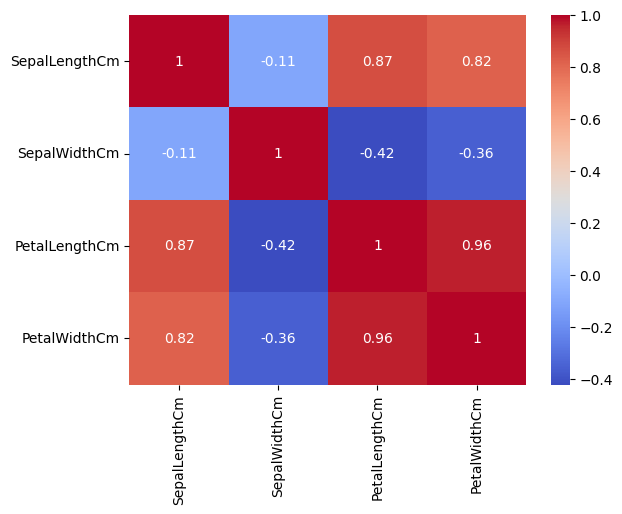

In [117]:
sns.heatmap(df.drop("Species",axis=1).corr(), annot=True,  cmap='coolwarm')

<h3>Model Prediction<h3>

In [77]:
df.drop(columns="Id",inplace=True)

In [81]:
label_encoder=LabelEncoder()
df["Species"]=label_encoder.fit_transform(df["Species"])


In [87]:
X=df.drop("Species",axis=1)
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [90]:
print(f"X_Train dim : {X_train.shape}")
print(f"X_Test dim : {X_test.shape}")
print(f"y_Train dim : {y_train.shape}")
print(f"y_Train dim : {y_test.shape}")


X_Train dim : (105, 4)
X_Test dim : (45, 4)
y_Train dim : (105,)
y_Train dim : (45,)


In [125]:
logestic=LogisticRegression()
logestic.fit(X_train,y_train)
y_train_pred=logestic.predict(X_train)
y_test_pred=logestic.predict(X_test)
print(f"Accurracy Train Score {accuracy_score(y_train,y_train_pred)}")
print(f"Accurracy Train Score {accuracy_score(y_test,y_test_pred)}")




Accurracy Train Score 0.9809523809523809
Accurracy Train Score 0.9777777777777777


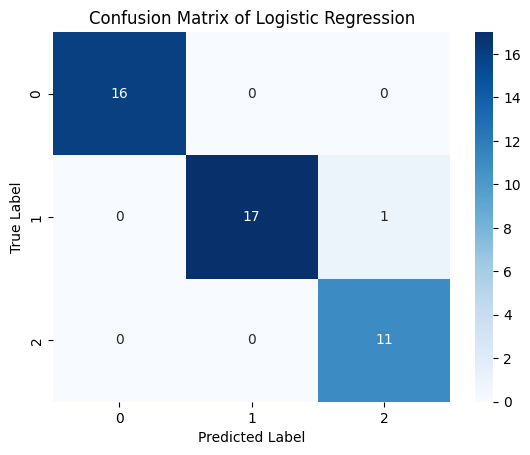

In [144]:
matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [129]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)
print(f"Accurracy Train Score {accuracy_score(y_train,y_train_pred)}")
print(f"Accurracy Train Score {accuracy_score(y_test,y_test_pred)}")

Accurracy Train Score 1.0
Accurracy Train Score 0.9777777777777777


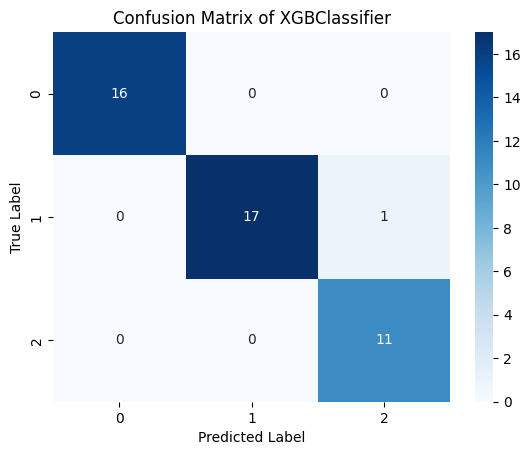

In [146]:
matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBClassifier')
plt.show()

In [131]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
print(f"Accurracy Train Score {accuracy_score(y_train,y_train_pred)}")
print(f"Accurracy Train Score {accuracy_score(y_test,y_test_pred)}")

Accurracy Train Score 1.0
Accurracy Train Score 0.9777777777777777


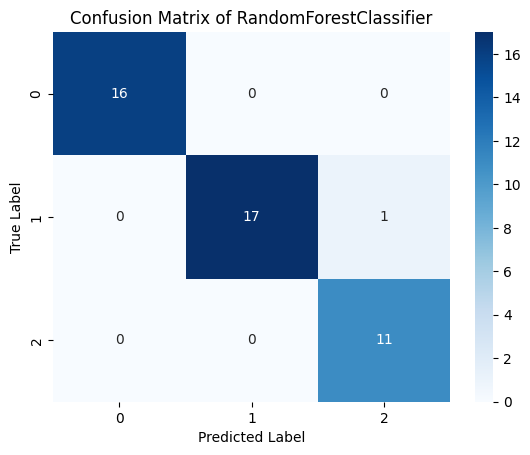

In [147]:
matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [134]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)
print(f"Accurracy Train Score {accuracy_score(y_train,y_train_pred)}")
print(f"Accurracy Train Score {accuracy_score(y_test,y_test_pred)}")

Accurracy Train Score 1.0
Accurracy Train Score 0.9777777777777777


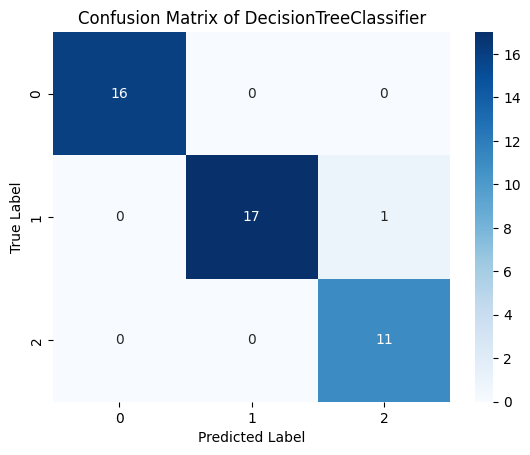

In [148]:
matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of DecisionTreeClassifier')
plt.show()

In [135]:
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)
y_train_pred=adb.predict(X_train)
y_test_pred=adb.predict(X_test)
print(f"Accurracy Train Score {accuracy_score(y_train,y_train_pred)}")
print(f"Accurracy Train Score {accuracy_score(y_test,y_test_pred)}")

Accurracy Train Score 0.9619047619047619
Accurracy Train Score 0.9111111111111111


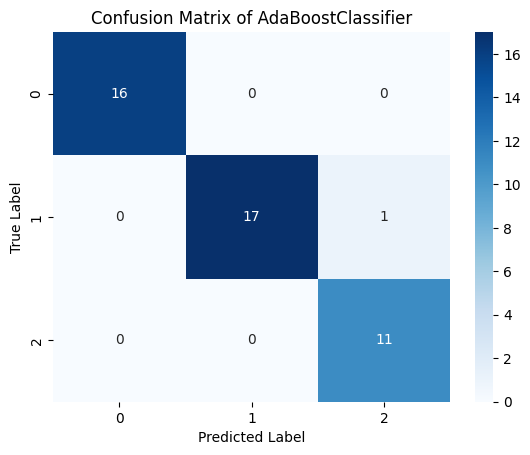

In [149]:
matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of AdaBoostClassifier')
plt.show()

In [136]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_train_pred=gbc.predict(X_train)
y_test_pred=gbc.predict(X_test)
print(f"Accurracy Train Score {accuracy_score(y_train,y_train_pred)}")
print(f"Accurracy Train Score {accuracy_score(y_test,y_test_pred)}")

Accurracy Train Score 1.0
Accurracy Train Score 0.9777777777777777


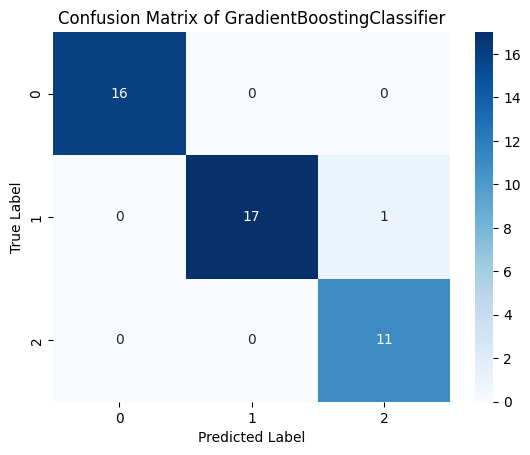

In [150]:
matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of GradientBoostingClassifier')
plt.show()